In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
scores = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/3_gradient_descent/Exercise/test_scores.csv')
scores

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [43]:
x=np.array(scores['math'])
y=np.array(scores['cs'])

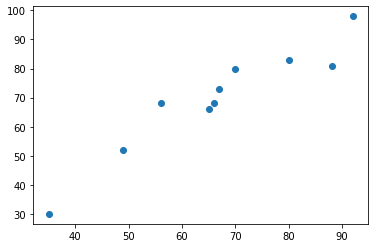

In [14]:
plt.scatter(x,y)
plt.show()

In [44]:
def grad_des(x,y):
    m=b=0
    iterations=100
    lr=0.01
    n=len(x)
    
    for i in range(iterations):
        y_pred=m*x+b
        cf=(1/n)*sum([j**2 for j in (y-y_pred)])
        
        m_der=-(2/n)*sum(x*(y-y_pred))
        b_der=-(2/n)*sum(y-y_pred)
        
        m=m-lr*m_der
        b=b-lr*b_der
        
        print(f'm= {m}, b= {b}, cf= {cf}, iteration= {i+1}')

In [45]:
grad_des(x,y)

m= 98.918, b= 1.3980000000000001, cf= 5199.1, iteration= 1
m= -9169.587968000002, b= -129.386408, cf= 45366108.340850405, iteration= 2
m= 859278.7790833284, b= 12125.168845408005, cf= 398290329619.79004, iteration= 3
m= -80513336.3321037, b= -1136112.3853868274, cf= 3496779946139640.5, iteration= 4
m= 7544007292.656351, b= 106452428.60001147, cf= 3.0699891720627802e+19, iteration= 5
m= -706864823521.7386, b= -9974470361.562872, cf= 2.6952892837845242e+23, iteration= 6
m= 66232422560018.44, b= 934596423272.1094, cf= 2.3663224578744982e+27, iteration= 7
m= -6205901966243919.0, b= -87570612045376.58, cf= 2.077506859218773e+31, iteration= 8
m= 5.814858905354231e+17, b= 8205265827097408.0, cf= 1.8239419296970382e+35, iteration= 9
m= -5.448456046050343e+19, b= -7.688239892447695e+17, cf= 1.6013252366146002e+39, iteration= 10
m= 5.105140772789593e+21, b= 7.203792526577272e+19, cf= 1.4058794699920812e+43, iteration= 11
m= -4.783458302630841e+23, b= -6.74987090568644e+21, cf= 1.2342883500192473

C:\Users\hp\AppData\Local\Temp\ipykernel_19532\608858777.py:9: RuntimeWarning: overflow encountered in double_scalars
  cf=(1/n)*sum([j**2 for j in (y-y_pred)])


# Check for m & b using Linear Regression

In [36]:
x=scores[['math']]
y=scores[['cs']]

In [37]:
model=LinearRegression().fit(x,y)

In [38]:
y_pred = model.predict(x)
y_pred

array([[95.54695319],
       [58.90844863],
       [91.47600824],
       [73.15675596],
       [83.33411834],
       [51.78429497],
       [68.06807477],
       [37.53598764],
       [69.08581101],
       [70.10354725]])

In [39]:
model.coef_

array([[1.01773624]])

In [40]:
model.intercept_

array([1.91521931])

### By gradient Descent method, m&b are overshooting the global minima.
### Using math.isclose stop the CF by a threshold value so that we get the global minima

In [98]:
def grad_des(x,y):
    
    global m,b,cf,iterations
    
    m=b=0
    iterations=10000
    lr=0.001
    n=len(x)
    prev_cf=0
    
    for i in range(iterations):
        y_pred=m*x+b
        cf=(1/n)*sum([j**2 for j in (y-y_pred)])
        
        if math.isclose(cf,prev_cf, rel_tol=1e-30):
            break
        prev_cf=cf
        
        m_der=-(2/n)*sum(x*(y-y_pred))
        b_der=-(2/n)*sum(y-y_pred)
        
        m=m-lr*m_der
        b=b-lr*b_der
        
#         if math.isclose(cf,prev_cf, rel_tol=1e-20):
#             break
#         prev_cf=cf
        
        print(f'm= {m}, b= {b}, cf= {cf}, iteration= {i+1}')

In [99]:
x=np.array(scores['math'])
y=np.array(scores['cs'])

In [100]:
grad_des(x,y)

m= 9.891800000000002, b= 0.1398, cf= 5199.1, iteration= 1
m= -73.89063968000005, b= -1.0422240800000002, cf= 370727.6662565042, iteration= 2
m= 635.7369779473285, b= 8.971449829408007, cf= 26593365.21283422, iteration= 3
m= -5374.727514955187, b= -75.84115332401389, cf= 1907777992.8722565, iteration= 4
m= 45533.21677472461, b= 642.5139249806472, cf= 136861998255.80414, iteration= 5
m= -385651.2277087454, b= -5441.869063972523, cf= 9818336798225.717, iteration= 6
m= 3266431.5217446033, b= 46092.15849604381, cf= 704357226503460.2, iteration= 7
m= -27666290.14670837, b= -390395.13732602727, cf= 5.052985171774353e+16, iteration= 8
m= 234330311.64447328, b= 3306602.156348863, cf= 3.6249587830483005e+18, iteration= 9
m= -1984750831.161688, b= -28006540.543865472, cf= 2.6005075677245276e+20, iteration= 10
m= 16810611721.985636, b= 237212183.72022378, cf= 1.8655769663967592e+22, iteration= 11
m= -142383951599.6276, b= -2009159966.5646977, cf= 1.3383454294637962e+24, iteration= 12
m= 1205975725

In [76]:
m,b

(1.3143840997598804e+153, 1.854708964220851e+151)

In [39]:
model.coef_

array([[1.01773624]])

In [40]:
model.intercept_

array([1.91521931])